# **Scatter Plots in Python**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import ast

In [2]:
df = pd.read_csv('D:\\python Programming\\DataSets\\data_jobs.csv')

**Performing some cleanups**

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [5]:
df = df[df['job_title_short'] == 'Data Scientist']

In [6]:
df_exploded = df.explode('job_skills')

In [11]:
df_final = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

In [17]:
top_10 = df_final.sort_values(by = 'skill_count',ascending = False).head(10)

In [18]:
top_10

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


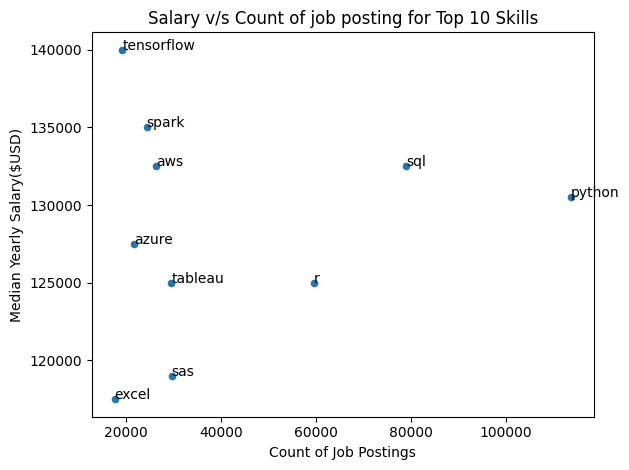

In [24]:
top_10.plot(kind = 'scatter',x = 'skill_count', y = 'median_salary')
for i,txt in enumerate(top_10.index):
    plt.text(top_10['skill_count'].iloc[i],top_10['median_salary'].iloc[i],txt)

plt.title('Salary v/s Count of job posting for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary($USD)')
plt.tight_layout()
plt.show()